# Uso
Para ejecutar todo el Notebook, arriba en el menu:
    Cell > RunAll
## SIR España 
Parametros a cambiar 

- MODELADO > Caso Real > Rango de Ajuste
    * initDay : dia inicial desde el cual queremos que empiece el ajuste 
    * day : Numero de dias desde initDay para ajustar
    * predictionNumber : Numero de dias de prediccion es decir initDay+day ++ predictionNumber

- MODELADO > Caso Real > Condiciones iniciales
    * export2Tex : True si se quiere exportar a Latex, caso contrario False

- MODELADO > Caso Real > Plot
    * yearsFuture : Numero de años a visualizar con los parametros beta y gamma obtenidos

# Imports

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate,optimize
from processingModule import getCities
import tikzplotlib
import os

plt.style.use("seaborn")
%matplotlib inline

In [100]:
def toLatex(name:str,export2Tex=False):
    if not os.path.exists('latex'):
        os.makedirs('latex')
    if(export2Tex):
        tikzplotlib.clean_figure()
        tikzplotlib.save(f"./latex/{name}.tex")

# SIR Model

In [101]:
'''
Modelo SIR - Simplificado
* y : funciones S(t),I(t),R(t)
* t : Espacio de partida - tiempo
* Args : Beta & Gamma - Parametros SIR
'''
def SIR(y,t,beta,gamma):
    S,I,R = y
    dS = -beta * S * I / N
    dI = beta * S * I / N - gamma * I
    dR = gamma * I
    return dS,dI,dR

'''
Modelo SIR - Con parametro de muertes
* y : funciones S(t),I(t),R(t)
* t : Espacio de partida - tiempo
* Args : Beta, Gamma & mu - Parametros SIR
'''
def SIR2(y,t,beta,gamma,mu):
    S,I,R = y
    dS = -beta * S * I/N + mu*(N-S)
    dI = beta * S * I/N -gamma*I-mu*I
    dR = gamma * I - mu*R
    return dS,dI,dR

# RSS - Residuos

In [102]:
'''
Funcion resiuduos
* Values = beta & gamma 
* Devuelve la suma de las diferencia al cuadrado, entre los datos reales y los predichos
'''
def functionRSS(values):
    beta, gamma = values
    # print(f'Called with \n\tBeta:{beta}\tGamma:{gamma}')
    infectius = integrate.odeint(SIR,(S0,I0,R0),xData,args=(beta,gamma))[:,1]
    residues = np.array([ (yData[i]-infectius[i]) for i in range(0,len(infectius)) ]) 
    return np.sum(np.power(residues,2))
'''
Funcion resiuduos
* Values = beta, gamma & mu
* Devuelve la suma de las diferencia al cuadrado, entre los datos reales y los predichos
'''
def functionRSS2(values):
    beta, gamma,mu = values
    # print(f'Called with \n\tBeta:{beta}\tGamma:{gamma}')
    infectius = integrate.odeint(SIR2,(S0,I0,R0),xData,args=(beta,gamma,mu))[:,1]
    residues = np.array([ (yData[i]-infectius[i]) for i in range(0,len(infectius)) ]) 
    return np.sum(np.power(residues,2))

# MODELADO

## Caso Real

### Valores Obtenidos

In [103]:
'''
Cojemos Datos y tomamos el primer valor que tiene infectados > 0
'''
try:
    city = getCities()["Spain"]
except Exception:
    city = getCities(True)["Spain"]
    
xData_Date = []
yData = []
first = 0
for i in city:
    if(i[1]>0):
        first +=1
    if(first>0):
        xData_Date.append(i[0])
        yData.append(i[1])
xData = [i for i in range(1,len(xData_Date)+1)]

Everything in order


In [104]:
'''
* initDay : Dia Inicial desde donde queremos predecir
* day : Cuantos dias desde `initDay` cortamos 
'''
initDay = 100
day=50

'''
* allRecovered : Recuperados acumulados - a partir del `inicio-15` todos los infectados acumulados
'''
allRecovered = 0
if(initDay>15):
    allRecovered = np.sum(xData[0:initDay-15])

'''
* predictionNumber : el numero de dias que queremos predecir desde `initDay + day` 
'''
predictionNumber = 14



In [105]:
'''
Tomamos dos espacios de partida
'''
# Espacio de prediccion
xDataPred = xData[initDay:initDay+day]
xDataPred = np.append(xDataPred,[i for i in range(xDataPred[len(xDataPred)-1] + 1, xDataPred[len(xDataPred)-1] +1 +predictionNumber)])

#si nos pasamos de tamaño total hay que añadir 0's y sino cojo los datos reales
if(initDay + day + predictionNumber < len(yData)):
    yDataPred = yData[initDay:initDay+day+predictionNumber] #cojo todos los datos reales
else:
    yDataPred = yData[initDay: initDay + day] #cojo los datos que haya reales
    yDataPred = np.append(yDataPred, np.zeros(predictionNumber, dtype=int)) #concateno un numero de 0's

# Espacio a minimizar residuos
xData=xData[initDay:initDay+day]
yData=yData[initDay:initDay+day]

yData = np.array(yData, dtype=int)
xData = np.array(xData, dtype=int)

print(xData)
print(yData)


print(xDataPred)
print(yDataPred)

[101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150]
[ 724  852  612  517  618  524  789  740  698  381  310  393  520  630
  609  585  446  429  512  590  640  529  757  441  428  648  695  973
  738  850  664  519  657  736  998 1323  818 1267  711 1076 1592 1812
 2038 2084 1881 1582 1582 1571 3082 2602]
[101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164]
[724, 852, 612, 517, 618, 524, 789, 740, 698, 381, 310, 393, 520, 630, 609, 585, 446, 429, 512, 590, 640, 529, 757, 441, 428, 648, 695, 973, 738, 850, 664, 519, 657, 736, 998, 1323, 818, 1267, 711, 1076, 1592, 1812, 2038, 2084, 1881, 1582, 1582, 1571, 3082, 2602, 2711, 2210, 1817

### Condiciones Iniciales

In [106]:
'''
CONDICIONES INICIALES : 
    - N : Tamaño poblacion inicial
    - I0 : Infectados Iniciales
    - S0 : Susceptibles Iniciales
    - export2Tex : Si quieres documento en latex (True), caso contrario (False)
'''
N = 46700000
I0 = yData[0]
R0 = allRecovered
S0 = N-I0-R0
export2Tex = True

### Obtenemos Beta y Gamma

In [107]:
'''
Minimizamos los residuos en base a la funcion de residuos especifica
'''
# Optimizamos la funcion de residuos con el SIR basico
res = optimize.minimize(functionRSS,[0.5,0.5],bounds=[(0,1),(0,1)])
beta, gamma = res.x
# Optimizamos la funcion de residuos con el SIR con muertes
res2 = optimize.minimize(functionRSS2,[0.5,0.5,0.1],bounds=[(0,1),(0,1),(0,1)])
beta2,gamma2, mu2 = res2.x
# Sacamos los valores obtenidos
print(f"Beta: {res.x[0]} \tGamma:{res.x[1]}\tR0={res.x[0]/res.x[1]}")
print(f"Beta: {res2.x[0]} \tGamma:{res2.x[1]}\tMu:{res2.x[2]}\tR0={res2.x[0]/res2.x[1]}")

Beta: 0.016278336960673587 	Gamma:0.0	R0=inf
Beta: 0.5528806246927414 	Gamma:0.44711904391688595	Mu:0.08942465414848726	R0=1.2365400942204448
<ipython-input-107-68dca8d02cac>:11: RuntimeWarning: divide by zero encountered in double_scalars
  print(f"Beta: {res.x[0]} \tGamma:{res.x[1]}\tR0={res.x[0]/res.x[1]}")


In [108]:
'''
Usando el espacio de predicciones - espacio a minimizar + continuacion datos, calculamos los valores
'''
resultFunctions = integrate.odeint(SIR, (S0, I0, R0), xDataPred, args=(beta, gamma))
resultFunctions2 = integrate.odeint(SIR2, (S0, I0, R0), xDataPred, args=(beta2, gamma2,mu2))


In [109]:
'''
Acumulamos los infectados y lo comparamos con las prediciones
'''
acumulativeInfectiusReal = []
acumulativeInfectius = []
acumulativeInfectius2 = []
for i in range(0,len(yDataPred)):
    if(i==0):
        acumulativeInfectiusReal.append(yDataPred[0])
        acumulativeInfectius.append(resultFunctions[0,1])
        acumulativeInfectius2.append(resultFunctions2[0,1])
    else:
        acumulativeInfectiusReal.append(acumulativeInfectiusReal[i-1]+yDataPred[i])
        acumulativeInfectius.append(acumulativeInfectius[i-1]+resultFunctions[i,1])
        acumulativeInfectius2.append(acumulativeInfectius2[i-1]+resultFunctions2[i,1])

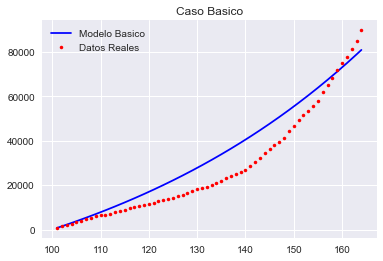

In [110]:
'''
Enfrentamos el modelo SIR basico con los datos reales y vemos si se predice correctamente
'''
plt.figure("Caso Basico")
plt.title("Caso Basico")
plt.plot(xDataPred,acumulativeInfectius,"b")
plt.plot(xDataPred, acumulativeInfectiusReal,'r.')
plt.legend(["Modelo Basico","Datos Reales"])
toLatex("Muertes Acumuladas - Caso Basico",export2Tex)
plt.show()

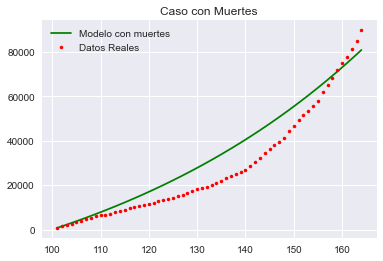

In [111]:
'''
Enfrentamos el modelo SIR - con muertes - con los datos reales y vemos si se predice correctamente
'''
plt.figure("Caso con muertes")
plt.title("Caso con Muertes")
plt.plot(xDataPred,acumulativeInfectius2,"g")
plt.plot(xDataPred, acumulativeInfectiusReal,'r.')
plt.legend(["Modelo con muertes","Datos Reales"])
toLatex("Muertes Acumuladas - Caso Muertes",export2Tex)
plt.show()

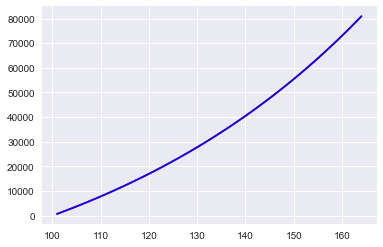

In [112]:
'''
Comparamos ambas graficas
'''
plt.plot(xDataPred,acumulativeInfectius2,"r")
plt.plot(xDataPred,acumulativeInfectius,"b")
plt.show()

### Plot

In [113]:
'''
Damos una vision global en base a los parametros obtenidos anteriormente
'''
yearsFuture = 1

predict = np.linspace(0.0,int(365*yearsFuture),num=int(365*yearsFuture))
resultFunctions = integrate.odeint(SIR, (S0, I0, R0), predict, args=(beta, gamma))
resultFunctions2 = integrate.odeint(SIR2, (S0, I0, R0), predict, args=(beta2, gamma2,mu2))

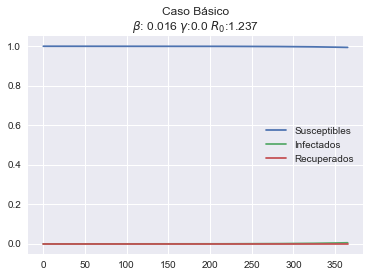

In [114]:
'''
Caso basico 
'''
plt.figure("Caso Basico")
plt.title(f"Caso Básico\n$\\beta$: {round(beta,3)} $\gamma$:{round(gamma,3)} $R_0$:{round(beta2/gamma2,3)}")
plt.plot(predict, resultFunctions[:,0]/N)
plt.plot(predict, resultFunctions[:,1]/N)
plt.plot(predict, resultFunctions[:,2]/N)
plt.legend(["Susceptibles","Infectados","Recuperados"])
toLatex("CasoBasico - España",export2Tex)
plt.show()

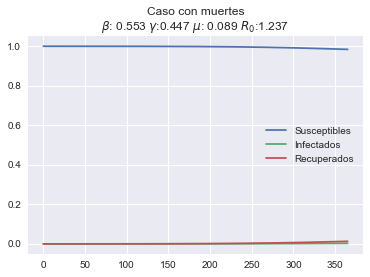

In [115]:
'''
Caso con muertes 
'''
plt.figure("Caso con muertes")
plt.title(f"Caso con muertes\n$\\beta$: {round(beta2,3)} $\gamma$:{round(gamma2,3)} $\mu$: {round(mu2,3)} $R_0$:{round(beta2/gamma2,3)}")
plt.plot(predict, resultFunctions2[:,0]/N)
plt.plot(predict, resultFunctions2[:,1]/N)
plt.plot(predict, resultFunctions2[:,2]/N)
plt.legend(["Susceptibles","Infectados","Recuperados"])
toLatex("CasoMuertes - España",export2Tex)
plt.show()